In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.random.rand(30,10)
assert np.linalg.matrix_rank(A) == 10
b = np.random.rand(30,)

In [3]:
def iterative_ls(A, b, max_iter=100):
    step_size = 1 / (np.linalg.norm(A, 2) ** 2)
    xs = np.zeros((max_iter, A.shape[1]))
    x = np.zeros(A.shape[1], dtype=np.float32)
    xs[0] = x
    print("Max-iterations: ", max_iter)
    for i in range(max_iter):
        x = x - step_size * (A.T @ (A @ x - b))
        xs[i] = x
    return x, xs


In [4]:
x_hat = np.linalg.lstsq(A, b,rcond=None)[0]
x,xs = iterative_ls(A, b,3000)
errors = np.linalg.norm(x_hat - xs, 2,axis=1)

Max-iterations:  3000


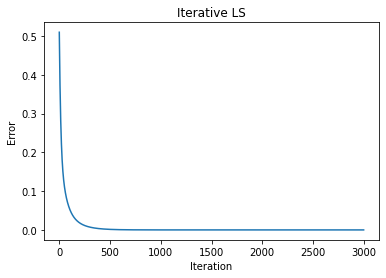

In [5]:
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Iterative LS')
plt.show()

As seen from the graph of $e_k = ||x_k - \hat{x}||_2$, the algorithm converges to the optimal solution $x = \hat{x}$.